# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

ANSWER:
The business goal is to understand what consumers value in a used car so that the used car dealership can make better recommendations to their customers. We need to explore what features are more important in driving the value of the car to consumers

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Module 11/practical_application_II_starter/data/vehicles.csv")

In [ ]:
# Read the CSV file into a DataFrame
# df = pd.read_csv('data/vehicles.csv')

In [ ]:
print(df.shape)

(426880, 18)


In [ ]:
print(df.dtypes)

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


In [ ]:
# get basics of numerical columns
print(df.describe())

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [ ]:
# For categorical columns, view the number of unique values and the top values.


for col in df.select_dtypes(['object']).columns:
    print(df[col].value_counts())
    print('-' * 40)

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64
----------------------------------------
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti         

In [ ]:
print(df.isnull().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [ ]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
df = df.dropna()
df.shape

(34868, 18)

In [ ]:
# prompt: remove columns VIN, region and ID

df = df.drop(['VIN', 'region', 'id','model'], axis=1)


<ipython-input-50-fa9c66867e82>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

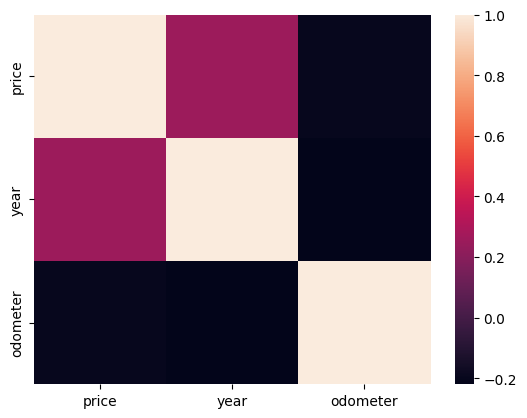

In [ ]:
# Heatmap showing the relationships between different numerical features
import seaborn as sns
sns.heatmap(df.corr())

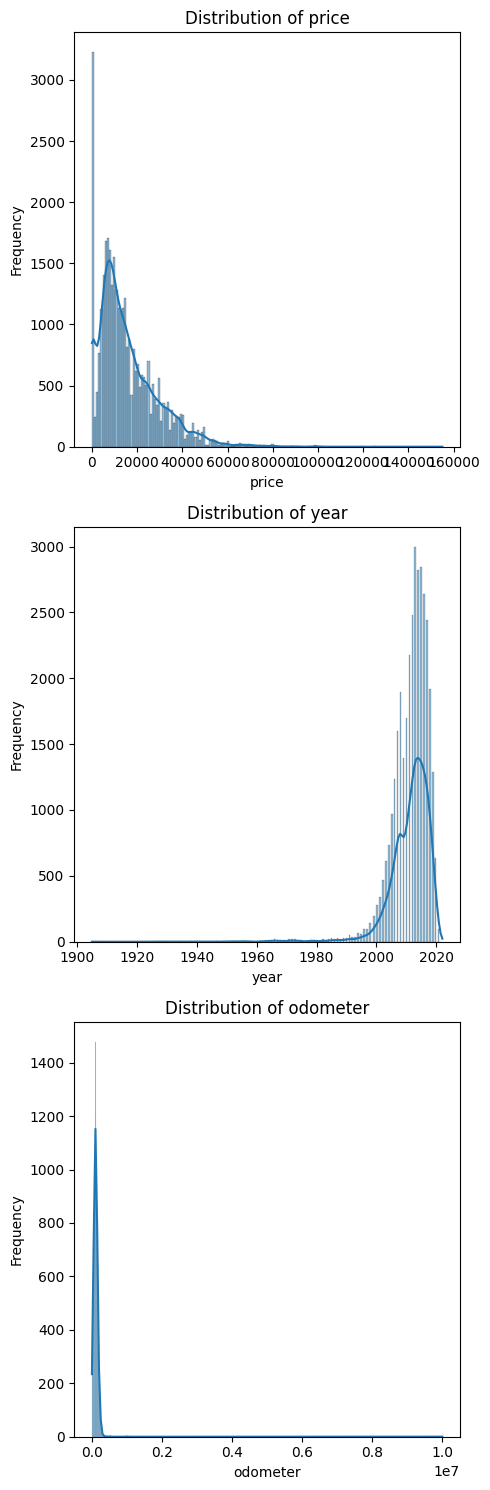

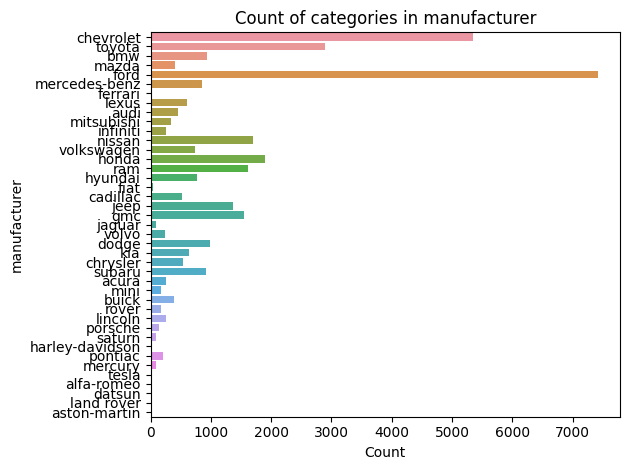

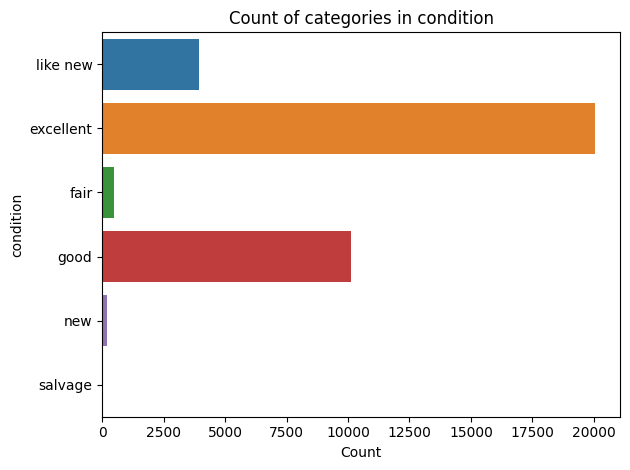

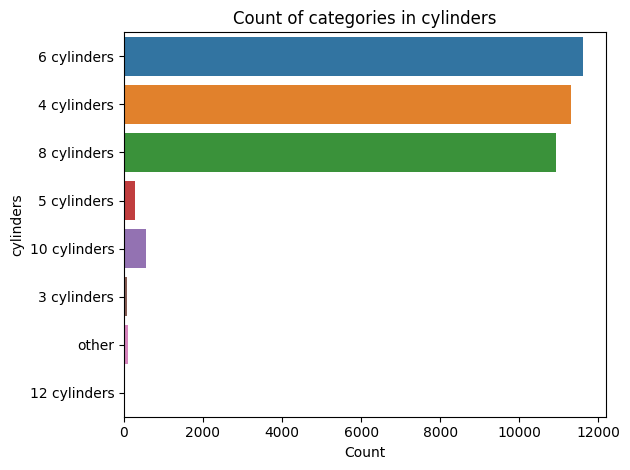

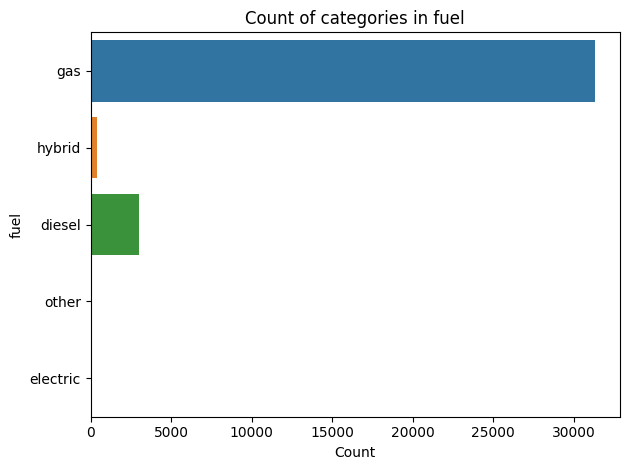

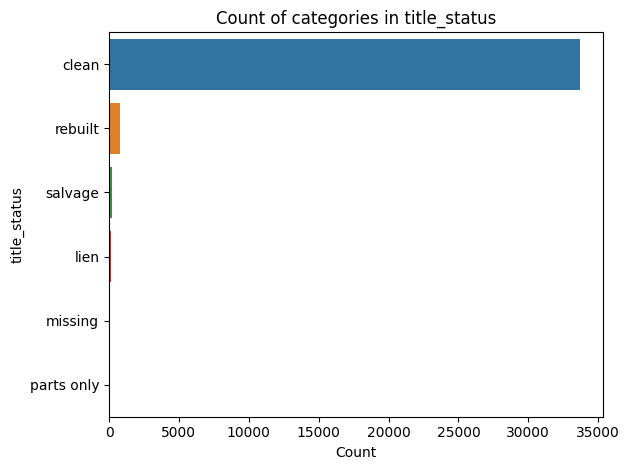

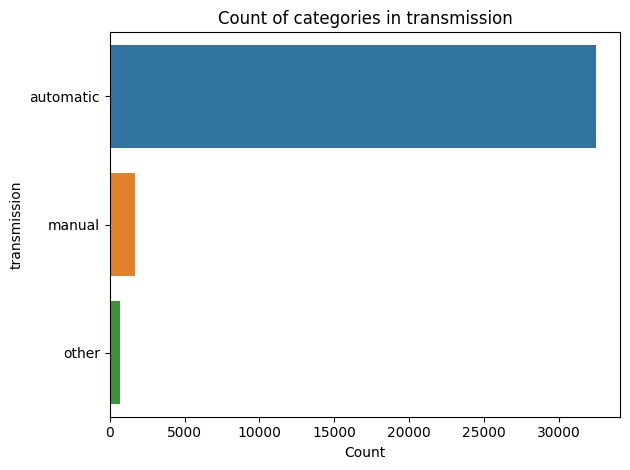

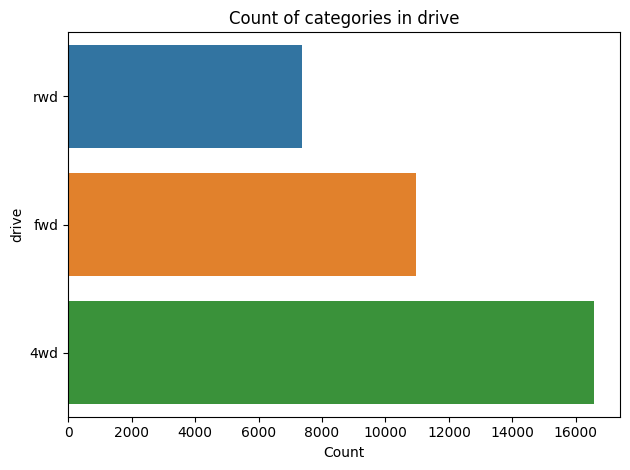

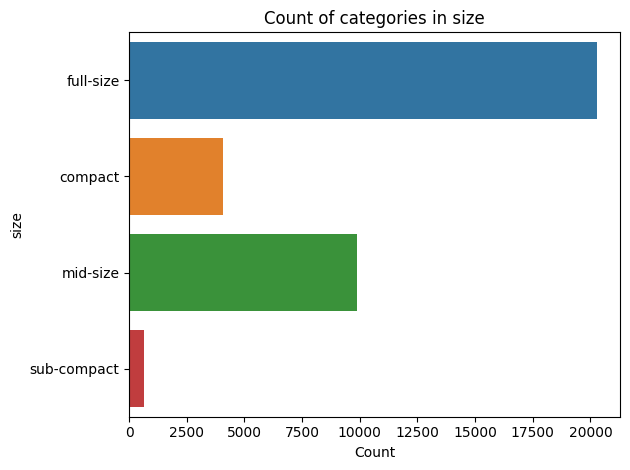

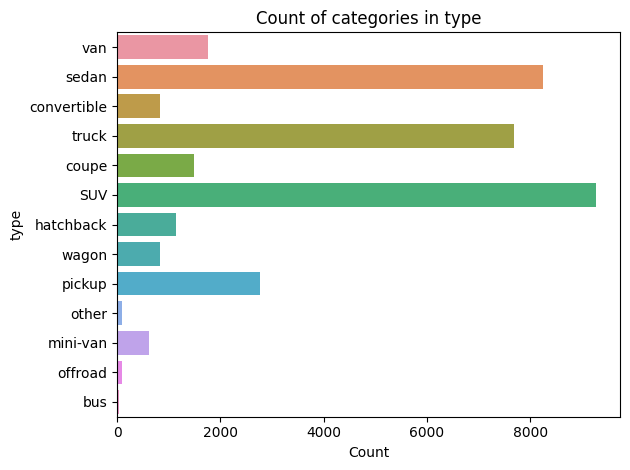

In [ ]:
# Charts showing histograms for numeric columns, and bar plots for categorical columns
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_columns = ['price', 'year', 'odometer']

# List of categorical columns
categorical_columns = ['manufacturer', 'condition',
                       'cylinders', 'fuel', 'title_status', 'transmission',
                       'drive', 'size', 'type']

# Setting up the figure and axes
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(5, 5*len(numeric_columns)))

# Plotting histograms for numeric columns
for ax, col in zip(axes, numeric_columns):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting bar plots for categorical columns
for col in categorical_columns:
    plt.figure()
    sns.countplot(y=df[col])
    plt.title(f'Count of categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [ ]:
# Looks like there are some outliers with very high odometer. Will filter cars with more than 300k miles.
df = df[df['odometer'] < 300000]

In [ ]:
# prompt: remove rows where price = 0

df = df[df['price'] != 0]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_cols = ['year', 'odometer']
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel',
                    'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

ct = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)  # drop one category to avoid multicollinearity
])


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
# regressor = LinearRegression()

In [ ]:
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame
X = df.drop(columns='price')
y = df['price']

# Create and fit the pipeline
pipeline = Pipeline([
    ('transformer', ct),
    ('regressor', regressor)
])

pipeline.fit(X, y)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color', 'state'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=10, random_state=0))])

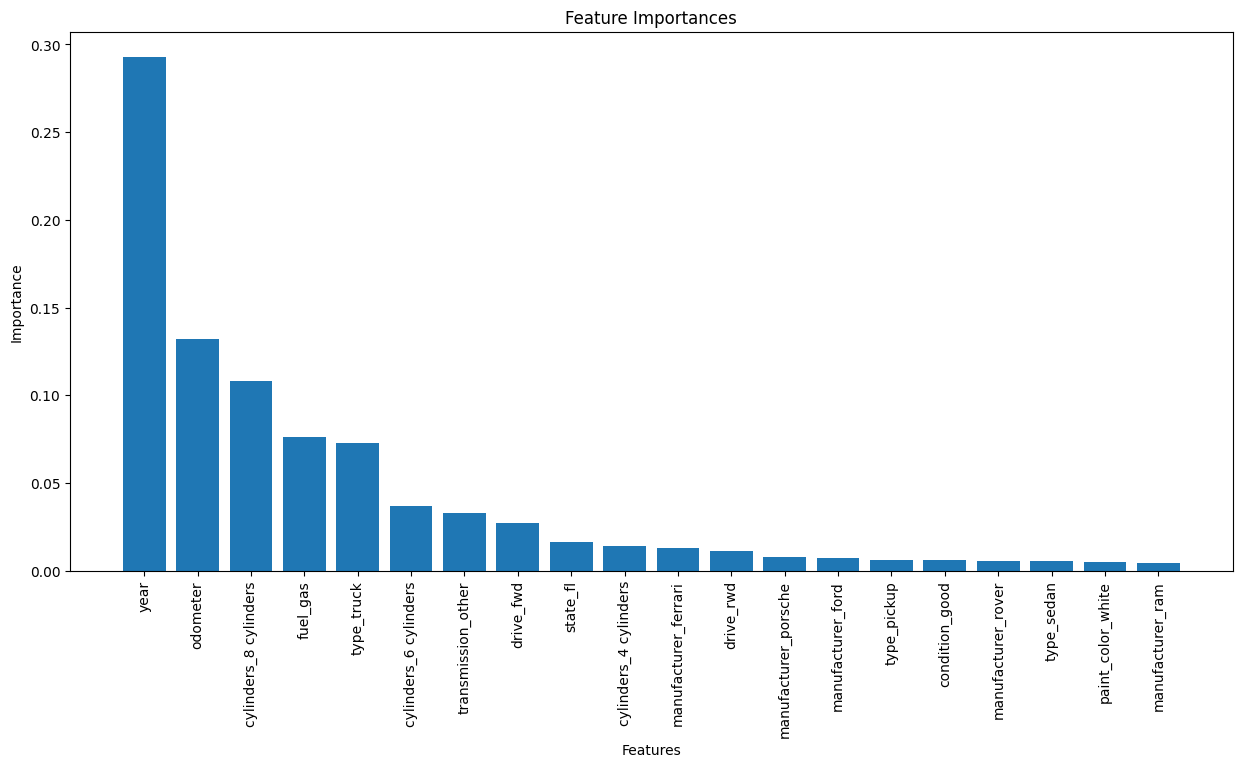

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names
feature_names = numeric_cols
ohe_feature_names = pipeline.named_steps['transformer'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names += list(ohe_feature_names)

# Get importances
importances = pipeline.named_steps['regressor'].feature_importances_

# Sort by importance
sorted_idx = np.argsort(importances)[::-1]
n_features_display = 20

# Plot
plt.figure(figsize=(15, 7))
# plt.bar(np.array(feature_names)[sorted_idx], importances[sorted_idx])
plt.bar(np.array(feature_names)[sorted_idx][:n_features_display],
        importances[sorted_idx][:n_features_display])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Calculate the RMSE for this model

from sklearn.metrics import mean_squared_error

y_pred = pipeline.predict(X)

print(mean_squared_error(y, y_pred, squared = False))

1959.9181450591943


Please refer to accompanying readme.txt for additional details